# SUBMITTED BY: SAHIB BIR SINGH BHATIA

# STUDENT ID: 201547831

# EMAIL: S.Bhatia2@liverpool.ac.uk

# MLP Network on IRIS Dataset

For IRIS dataset as there are 3 classes i have chosen the encoding scheme of 0,1,2 for the respective classes in the train function.

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import random
class NeuralNetwork(object):
    def __init__(self,inp,hi,out,act,labels):
        # parameters
        self.inputLayerSize = inp                      
        self.hiddenLayerSize = hi                     
        self.outputLayerSize = out                      
        self.alpha = 0.005                   
        self.max_epochs = 0                     
        self.BiasHiddenValue = -1                  
        self.BiasOutputValue = -1                  
        self.activation = self.activationList[act]
        self.deriv = self.derivativeList[act]
        self.classes_number = labels
        
        'Starting Bias and Weights'
        self.WEIGHT_hidden = [[2  * random.random() - 1 for i in range(self.hiddenLayerSize)] 
                              for j in range(self.inputLayerSize)]
        self.WEIGHT_output = [[2  * random.random() - 1 for i in range(self.outputLayerSize)] 
                              for j in range(self.hiddenLayerSize)]
        self.BIAS_hidden = np.array([self.BiasHiddenValue for i in range(self.hiddenLayerSize)])
        self.BIAS_output = np.array([self.BiasOutputValue for i in range(self.outputLayerSize)])
        

    activationList = {
         'sigmoid': (lambda s: 1/(1 + np.exp(-s))),
            'tanh': (lambda t: np.tanh(t)),
            'Relu': (lambda r: r*(r > 0)),
               }
    derivativeList = {
         'sigmoid': (lambda s: s*(1-s)),
            'tanh': (lambda t: 1-t**2),
            'Relu': (lambda r: 1 * (r>0))
               }
        
    def feedForward(self, X):
        #forward propogation through the network
        self.OUTPUT_L1 = self.activation((np.dot(X, self.WEIGHT_hidden) + self.BIAS_hidden.T))
        self.OUTPUT_L2 = self.activation((np.dot(self.OUTPUT_L1, self.WEIGHT_output) + self.BIAS_output.T))
        return self.OUTPUT_L2
       
        
    def backward(self, X):
        #backward propogate through the network
        ERROR_output = self.output - self.OUTPUT_L2
        DELTA_output = ((-1)*(ERROR_output) * self.deriv(self.OUTPUT_L2))
        #Update weights OutputLayer and HiddenLayer
        arrayStore = []
        for i in range(self.hiddenLayerSize):
            for j in range(self.outputLayerSize):
                self.WEIGHT_output[i][j] -= (self.alpha * (DELTA_output[j] * self.OUTPUT_L1[i]))
                self.BIAS_output[j] -= (self.alpha * DELTA_output[j])
                
        delta_hidden = np.matmul(self.WEIGHT_output, DELTA_output)* self.deriv(self.OUTPUT_L1)
 
        #Update weights HiddenLayer and InputLayer
        for i in range(self.outputLayerSize):
            for j in range(self.hiddenLayerSize):
                self.WEIGHT_hidden[i][j] -= (self.alpha * (delta_hidden[j] * X[i]))
                self.BIAS_hidden[j] -= (self.alpha * delta_hidden[j])
        
    def train(self, X, y,epoch):
        self.max_epochs = epoch
        count_epoch = 1
        total_error = 0
        n = len(X); 
        epoch_array = []
        error_array = []
        W0 = []
        W1 = []
        while(count_epoch <= self.max_epochs):
            for idx,inputs in enumerate(X): 
                self.output = np.zeros(self.classes_number)
                # forward propagation
                self.feedForward(inputs)
                # encoding of classes for easier classification
                if(y[idx] == 0): 
                    self.output = np.array([1,0,0]) #Class1 {1,0,0}
                elif(y[idx] == 1):
                    self.output = np.array([0,1,0]) #Class2 {0,1,0}
                elif(y[idx] == 2):
                    self.output = np.array([0,0,1]) #Class3 {0,0,1}
                square_error = 0
                for i in range(self.outputLayerSize):
                    erro = (self.output[i] - self.OUTPUT_L2[i])**2
                    square_error = (square_error + (0.05 * erro))
                    total_error = total_error + square_error
                 # BackWard Pass
                self.backward(inputs)
            total_error = (total_error / n)
            if((count_epoch % 50 == 0)or(count_epoch == 1)):
                print("Epoch ", count_epoch, "- Total Error: ",total_error)
                error_array.append(total_error)
                epoch_array.append(count_epoch)
            # Adding weights to their respective lists
            W0.append(self.WEIGHT_hidden)
            W1.append(self.WEIGHT_output)
            count_epoch += 1
            
        # plottting errors and weights after training
        self.plotError(error_array,epoch_array)
        plt.plot(W0[0])
        plt.title('Hidden Weight update during training')
        # Legend changes wrt hidden layer size
        plt.legend(['neuron1', 'neuron2', 'neuron3', 'neuron4', 'neuron5'])
        plt.ylabel('Value Weight')
        plt.show()
        
        plt.plot(W1[0])
        plt.title('Output Weight update during training')
        plt.legend(['neuron1', 'neuron2', 'neuron3'])
        plt.ylabel('Value Weight')
        plt.show()

        return self
    
    def plotError(self,arr1,arr2):
        plt.figure(figsize=(9,4))
        plt.plot(arr2, arr1, "m-",color="b", marker=11)
        plt.xlabel("Number of Epochs")
        plt.ylabel("Squared error (MSE) ");
        plt.title("Error Minimization")
        plt.show()
        
    
    def predict(self, X, y):
        model_predictions = []
        #feed Forward
        forward = np.matmul(X,self.WEIGHT_hidden) + self.BIAS_hidden
        forward = np.matmul(forward, self.WEIGHT_output) + self.BIAS_output
                                 
        for item in forward:
            model_predictions.append(max(enumerate(item), key=lambda x:x[1])[0])
        return model_predictions
        

Epoch  1 - Total Error:  0.07365731945380388
Epoch  50 - Total Error:  0.043836356110070016
Epoch  100 - Total Error:  0.03621076979072871
Epoch  150 - Total Error:  0.03241165966284485
Epoch  200 - Total Error:  0.030306828803065657
Epoch  250 - Total Error:  0.028769324063913256
Epoch  300 - Total Error:  0.027300077756113532
Epoch  350 - Total Error:  0.02571161329308328
Epoch  400 - Total Error:  0.023970524827177583
Epoch  450 - Total Error:  0.022132197853990163
Epoch  500 - Total Error:  0.02029826974805861
Epoch  550 - Total Error:  0.018568549412242123
Epoch  600 - Total Error:  0.017007283015856963


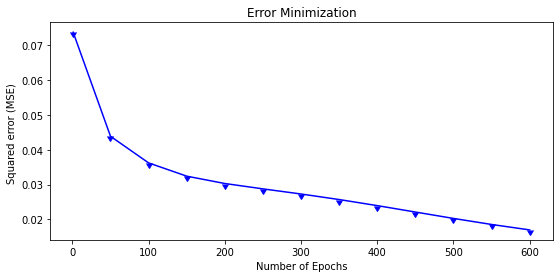

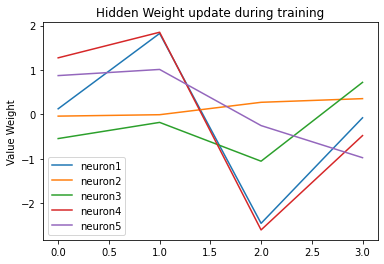

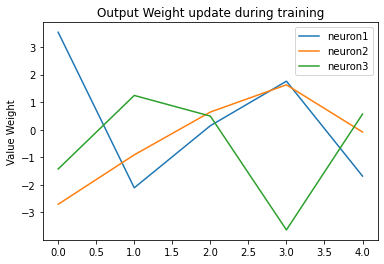

In [12]:
import random
from sklearn.datasets import load_iris
iris_data = load_iris()
random.seed(103)

def separate_data():
    A = iris_dataset[0:40]
    tA = iris_dataset[40:50]
    B = iris_dataset[50:90]
    tB = iris_dataset[90:100]
    C = iris_dataset[100:140]
    tC = iris_dataset[140:150]
    train = np.concatenate((A,B,C))
    test =  np.concatenate((tA,tB,tC))
    return train,test

train_porcent = 80 # Porcent Training 
test_porcent = 20 # Porcent Test
iris_dataset = np.column_stack((iris_data.data,iris_data.target.T)) #Join X and Y
iris_dataset = list(iris_dataset)
random.shuffle(iris_dataset)

Filetrain, Filetest = separate_data()

train_X = np.array([i[:4] for i in Filetrain])
train_y = np.array([i[4] for i in Filetrain])
test_X = np.array([i[:4] for i in Filetest])
test_y = np.array([i[4] for i in Filetest])
mlp = NeuralNetwork(4,5,3,"sigmoid",3)
mlp.train(train_X,train_y,600)

In [14]:
predicted = mlp.predict(test_X,test_y)
count = 0
for i in range(len(predicted)):
    if predicted[i] == test_y[i]:
        count = count + 1
print(count/len(predicted)*100)

93.33333333333333


Epoch  1 - Total Error:  0.07833662114677463
Epoch  50 - Total Error:  0.027103730489004683
Epoch  100 - Total Error:  0.013775001737374825
Epoch  150 - Total Error:  0.010022599993480395
Epoch  200 - Total Error:  0.009012285248776085
Epoch  250 - Total Error:  0.008690199750591371
Epoch  300 - Total Error:  0.00858212173605023
Epoch  350 - Total Error:  0.008520793946505739
Epoch  400 - Total Error:  0.008466014432593474
Epoch  450 - Total Error:  0.008427308560356308
Epoch  500 - Total Error:  0.008406151515957963
Epoch  550 - Total Error:  0.008396201239083866
Epoch  600 - Total Error:  0.008391669417573388


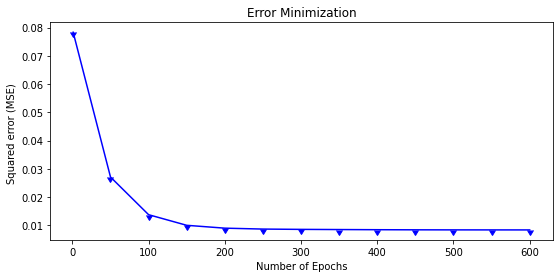

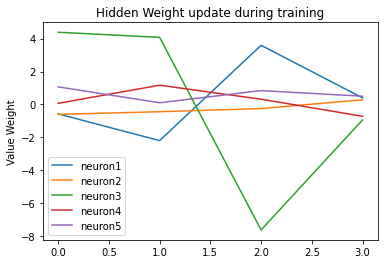

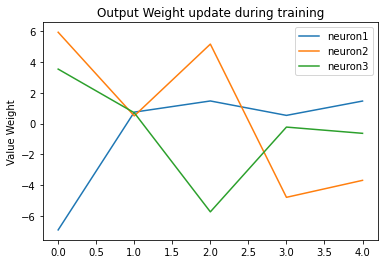

80.0


In [17]:
# With learning rate 0.05
mlp2 = NeuralNetwork(4,5,3,"sigmoid",3)
mlp2.train(train_X,train_y,600)
predicted = mlp2.predict(test_X,test_y)
count = 0
for i in range(len(predicted)):
    if predicted[i] == test_y[i]:
        count = count + 1
print(count/len(predicted)*100)

Epoch  1 - Total Error:  0.06702817420213004
Epoch  50 - Total Error:  0.01766478064158227
Epoch  100 - Total Error:  0.00970477518830051
Epoch  150 - Total Error:  0.009223383151058832
Epoch  200 - Total Error:  0.009002687777241454
Epoch  250 - Total Error:  0.009764573661478362
Epoch  300 - Total Error:  0.009393932990398814
Epoch  350 - Total Error:  0.00957946989138608
Epoch  400 - Total Error:  0.009649614421422219
Epoch  450 - Total Error:  0.009618598813171892
Epoch  500 - Total Error:  0.009753882862655014
Epoch  550 - Total Error:  0.009487211958337731
Epoch  600 - Total Error:  0.009204746444712027


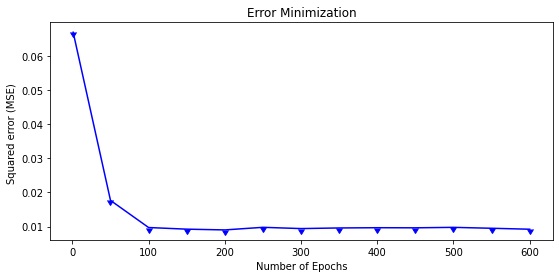

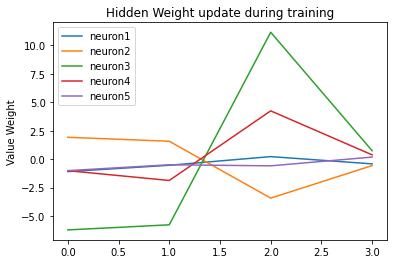

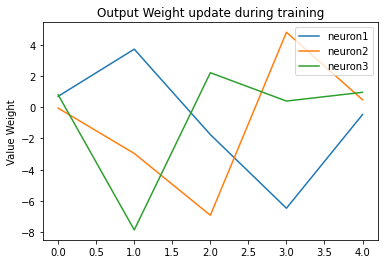

43.333333333333336


In [19]:
# With learning rate 0.1
mlp3 = NeuralNetwork(4,5,3,"sigmoid",3)
mlp3.train(train_X,train_y,600)
predicted = mlp3.predict(test_X,test_y)
count = 0
for i in range(len(predicted)):
    if predicted[i] == test_y[i]:
        count = count + 1
print(count/len(predicted)*100)

Epoch  1 - Total Error:  0.07372097013005892
Epoch  50 - Total Error:  0.0322292502453713
Epoch  100 - Total Error:  0.027366418105300112
Epoch  150 - Total Error:  0.02458895966070472
Epoch  200 - Total Error:  0.02221525903350083
Epoch  250 - Total Error:  0.019965257969215965
Epoch  300 - Total Error:  0.01785810218945262
Epoch  350 - Total Error:  0.01597630834694007
Epoch  400 - Total Error:  0.014374000395876685
Epoch  450 - Total Error:  0.01305518528778054
Epoch  500 - Total Error:  0.01198908300645966
Epoch  550 - Total Error:  0.01113208402250196
Epoch  600 - Total Error:  0.010441817615232373


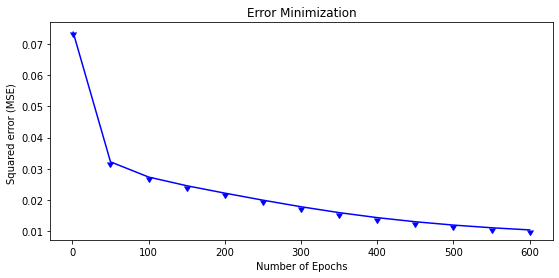

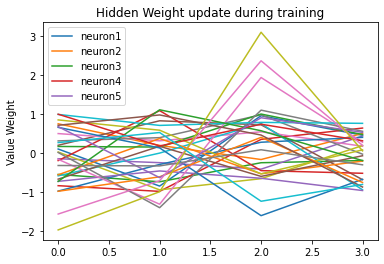

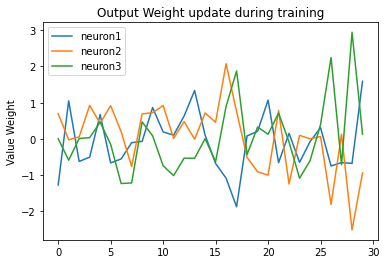

63.33333333333333


In [21]:
# With increasing hidden neurons
mlp4 = NeuralNetwork(4,30,3,"sigmoid",3)
mlp4.train(train_X,train_y,600)
predicted = mlp4.predict(test_X,test_y)
count = 0
for i in range(len(predicted)):
    if predicted[i] == test_y[i]:
        count = count + 1
print(count/len(predicted)*100)

# MLP Network on XOR

For XOR dataset as there are 2 classes so i have chosen the encoding scheme of 0,1 for the respective classes in the train function.

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import random
class NeuralNetworkForXor(object):
    def __init__(self,inp,hi,out,act,labels):
        # parameters
        self.inputLayerSize = inp                      
        self.hiddenLayerSize = hi                     
        self.outputLayerSize = out                      
        self.alpha = 0.1                   
        self.max_epochs = 0                     
        self.BiasHiddenValue = -1                  
        self.BiasOutputValue = -1                  
        self.activation = self.activationList[act]
        self.deriv = self.derivativeList[act]
        self.classes_number = labels
        
        # bias and weights
        self.WEIGHT_hidden = [[2  * random.random() - 1 for i in range(self.hiddenLayerSize)] 
                              for j in range(self.inputLayerSize)]
        self.WEIGHT_output = [[2  * random.random() - 1 for i in range(self.outputLayerSize)] 
                              for j in range(self.hiddenLayerSize)]
        self.BIAS_hidden = np.array([self.BiasHiddenValue for i in range(self.hiddenLayerSize)])
        self.BIAS_output = np.array([self.BiasOutputValue for i in range(self.outputLayerSize)])
        

    activationList = {
         'sigmoid': (lambda s: 1/(1 + np.exp(-s))),
            'tanh': (lambda t: np.tanh(t)),
            'Relu': (lambda r: r*(r > 0)),
               }
    derivativeList = {
         'sigmoid': (lambda s: s*(1-s)),
            'tanh': (lambda t: 1-t**2),
            'Relu': (lambda r: 1 * (r>0))
               }
        
    def feedForward(self, X):
        #forward propogation through the network
        self.OUTPUT_L1 = self.activation((np.dot(X, self.WEIGHT_hidden) + self.BIAS_hidden.T))
        self.OUTPUT_L2 = self.activation((np.dot(self.OUTPUT_L1, self.WEIGHT_output) + self.BIAS_output.T))
        return self.OUTPUT_L2
       
        
    def backward(self, X):
        #backward propogate through the network
        ERROR_output = self.output - self.OUTPUT_L2
        DELTA_output = ((-1)*(ERROR_output) * self.deriv(self.OUTPUT_L2))
        #Update weights OutputLayer and HiddenLayer
        arrayStore = []
        for i in range(self.hiddenLayerSize):
            for j in range(self.outputLayerSize):
                self.WEIGHT_output[i][j] -= (self.alpha * (DELTA_output[j] * self.OUTPUT_L1[i]))
                self.BIAS_output[j] -= (self.alpha * DELTA_output[j])
                
        delta_hidden = np.matmul(self.WEIGHT_output, DELTA_output)* self.deriv(self.OUTPUT_L1)
 
        #Update weights HiddenLayer and InputLayer
        for i in range(self.outputLayerSize):
            for j in range(self.hiddenLayerSize):
                self.WEIGHT_hidden[i][j] -= (self.alpha * (delta_hidden[j] * X[i]))
                self.BIAS_hidden[j] -= (self.alpha * delta_hidden[j])
        
    def train(self, X, y,epoch):
        self.max_epochs = epoch
        count_epoch = 1
        total_error = 0
        n = len(X); 
        epoch_array = []
        error_array = []
        W0 = []
        W1 = []
        while(count_epoch <= self.max_epochs):
            for idx,inputs in enumerate(X): 
                self.output = np.zeros(self.classes_number)
                # forward propagation
                self.feedForward(inputs)
                # encoding of classes for easier classification
                if(y[idx] == 0): 
                    self.output = np.array([0]) #Class1 {0}
                elif(y[idx] == 1):
                    self.output = np.array([1]) #Class2 {1}
                square_error = 0
                for i in range(self.outputLayerSize):
                    erro = (self.output[i] - self.OUTPUT_L2[i])**2
                    square_error = (square_error + (0.05 * erro))
                    total_error = total_error + square_error
                 # BackWard Pass
                self.backward(inputs)
            total_error = (total_error / n)
            if((count_epoch % 50 == 0)or(count_epoch == 1)):
                print("Epoch ", count_epoch, "- Total Error: ",total_error)
                error_array.append(total_error)
                epoch_array.append(count_epoch)
            # Adding weights to their respective lists
            W0.append(self.WEIGHT_hidden)
            W1.append(self.WEIGHT_output)
            count_epoch += 1
            
        # plottting errors and weights after training
        self.plotError(error_array,epoch_array)
        plt.plot(W0[0])
        plt.title('Hidden Weight update during training')
        # Legend changes wrt hidden layer size
        plt.legend(['neuron1', 'neuron2', 'neuron3'])
        plt.ylabel('Value Weight')
        plt.show()
        
        plt.plot(W1[0])
        plt.title('Output Weight update during training')
        plt.legend(['neuron1'])
        plt.ylabel('Value Weight')
        plt.show()

        return self
    
    def plotError(self,arr1,arr2):
        plt.figure(figsize=(9,4))
        plt.plot(arr2, arr1, "m-",color="r", marker=1)
        plt.xlabel("Number of Epochs")
        plt.ylabel("Squared error (MSE) ");
        plt.title("Error Minimization")
        plt.show()
        
    
    def predict(self, X, y):
        model_predictions = []
        #feed Forward
        forward = np.matmul(X,self.WEIGHT_hidden) + self.BIAS_hidden
        forward = np.matmul(forward, self.WEIGHT_output) + self.BIAS_output
                                 
        for item in forward:
            model_predictions.append(max(enumerate(item), key=lambda x:x[1])[0])
        return model_predictions
        pass

Epoch  1 - Total Error:  0.016613724024337185
Epoch  50 - Total Error:  0.01710981067767758
Epoch  100 - Total Error:  0.01682440191149846
Epoch  150 - Total Error:  0.0167903770283551
Epoch  200 - Total Error:  0.016785592069950197
Epoch  250 - Total Error:  0.016784165854979383
Epoch  300 - Total Error:  0.016783168969731553
Epoch  350 - Total Error:  0.01678226157805199
Epoch  400 - Total Error:  0.016781400119987164
Epoch  450 - Total Error:  0.016780576684337894
Epoch  500 - Total Error:  0.016779788283103718
Epoch  550 - Total Error:  0.01677903286590321
Epoch  600 - Total Error:  0.016778308683620867


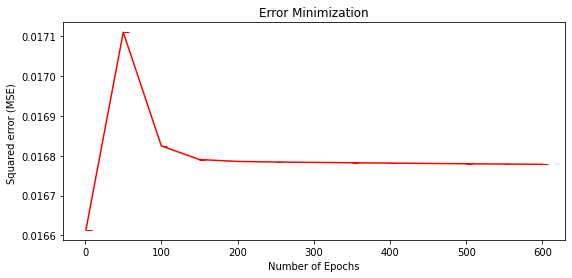

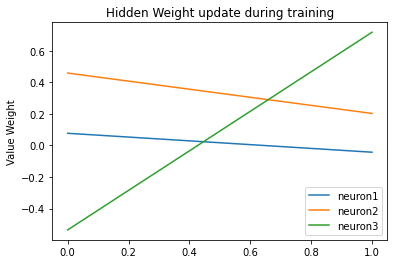

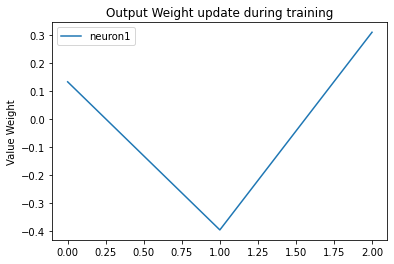

50.0


In [97]:
train_X = np.array([[0,0],[0,1],[1,0],[1,1]])
train_y = np.array([[0],[1],[1],[0]])

mlp6 = NeuralNetworkForXor(2,3,1,"sigmoid",2)
mlp6.train(train_X,train_y,600)
predicted = mlp6.predict(train_X,train_y)
count = 0
for i in range(len(predicted)):
    if predicted[i] == train_y[i]:
        count = count + 1
print(count/len(predicted)*100)

Epoch  1 - Total Error:  0.022287778976582802
Epoch  50 - Total Error:  0.01733826367671516
Epoch  100 - Total Error:  0.016060326495749636
Epoch  150 - Total Error:  0.014471761698610676
Epoch  200 - Total Error:  0.012897536884160163
Epoch  250 - Total Error:  0.011911482860681073
Epoch  300 - Total Error:  0.011318862096647357
Epoch  350 - Total Error:  0.010933633487800068
Epoch  400 - Total Error:  0.010660321792106048
Epoch  450 - Total Error:  0.01044966851029052
Epoch  500 - Total Error:  0.010273463761033105
Epoch  550 - Total Error:  0.010112909753788226
Epoch  600 - Total Error:  0.009952681973691417


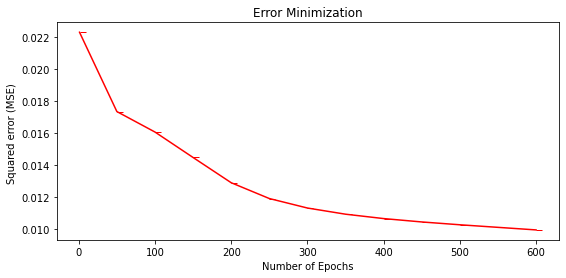

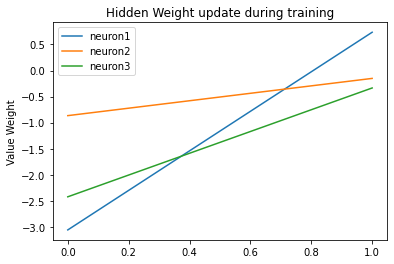

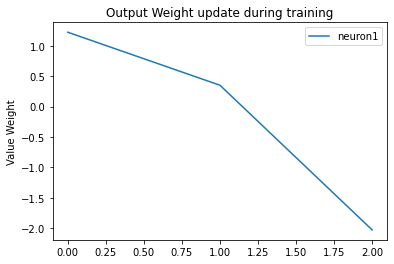

50.0


In [98]:
predicted = []
mlp7 = NeuralNetworkForXor(2,3,1,"tanh",2)
mlp7.train(train_X,train_y,600)
predicted = mlp7.predict(train_X,train_y)
count = 0
for i in range(len(predicted)):
    if predicted[i] == train_y[i]:
        count = count + 1
print(count/len(predicted)*100)

Epoch  1 - Total Error:  0.025
Epoch  50 - Total Error:  0.03333333333333334
Epoch  100 - Total Error:  0.03333333333333334
Epoch  150 - Total Error:  0.03333333333333334
Epoch  200 - Total Error:  0.03333333333333334
Epoch  250 - Total Error:  0.03333333333333334
Epoch  300 - Total Error:  0.03333333333333334
Epoch  350 - Total Error:  0.03333333333333334
Epoch  400 - Total Error:  0.03333333333333334
Epoch  450 - Total Error:  0.03333333333333334
Epoch  500 - Total Error:  0.03333333333333334
Epoch  550 - Total Error:  0.03333333333333334
Epoch  600 - Total Error:  0.03333333333333334


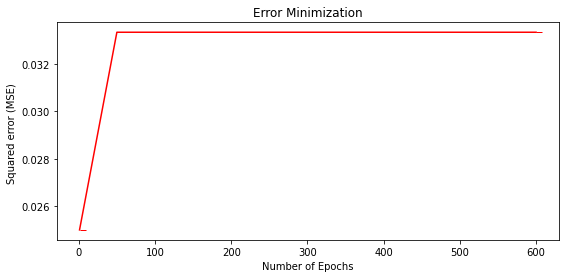

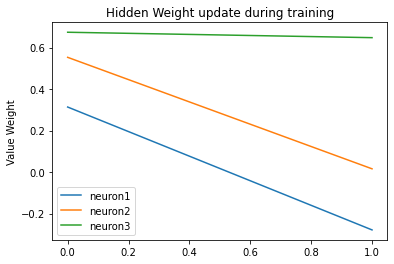

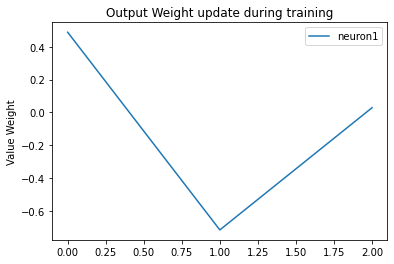

50.0


In [99]:
mlp8 = NeuralNetworkForXor(2,3,1,"Relu",2)
mlp8.train(train_X,train_y,600)
predicted = mlp8.predict(train_X,train_y)
count = 0
for i in range(len(predicted)):
    if predicted[i] == train_y[i]:
        count = count + 1
print(count/len(predicted)*100)

Epoch  1 - Total Error:  0.023639895520964904
Epoch  50 - Total Error:  0.016357647919270576
Epoch  100 - Total Error:  0.014426088581012787
Epoch  150 - Total Error:  0.0028538467308785575
Epoch  200 - Total Error:  0.0011072783974514122
Epoch  250 - Total Error:  0.0006588996950898225
Epoch  300 - Total Error:  0.0004616167507554452
Epoch  350 - Total Error:  0.0003522871197686932
Epoch  400 - Total Error:  0.00028336182326901214
Epoch  450 - Total Error:  0.0002361684276182963
Epoch  500 - Total Error:  0.00020194318280293956
Epoch  550 - Total Error:  0.00017604926058985298
Epoch  600 - Total Error:  0.00015581171700216793


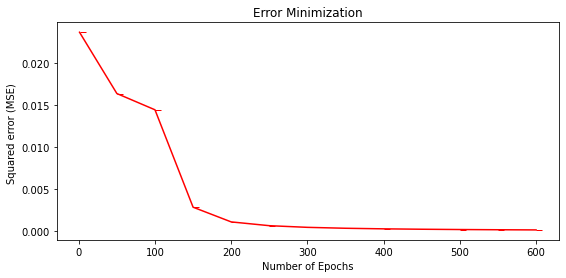

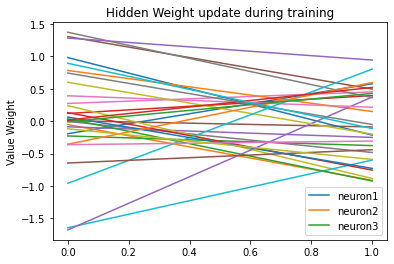

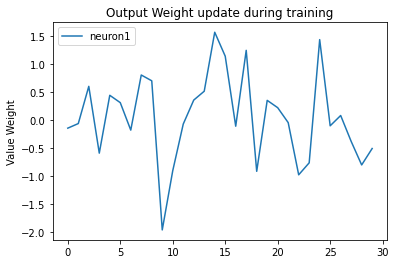

50.0


In [100]:
predicted = []
mlp9 = NeuralNetworkForXor(2,30,1,"tanh",2)
mlp9.train(train_X,train_y,600)
predicted = mlp9.predict(train_X,train_y)
count = 0
for i in range(len(predicted)):
    if predicted[i] == train_y[i]:
        count = count + 1
print(count/len(predicted)*100)